In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('new-site.csv', delimiter='	')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   site        300 non-null    int64
 1   dwell-time  300 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


In [11]:
df.groupby('site').mean()

,dwell-time
site,
0,90.849462
1,88.000000


In [10]:
df.sum()

site            114
dwell-time    26930
dtype: int64

In [23]:
round(df.groupby('site').count())

,dwell-time
site,
0,186
1,114


In [12]:
round(df.groupby('site').mean())

,dwell-time
site,
0,91.0
1,88.0


In [16]:
alpha = 0.05


In [ ]:
data = pd.DataFrame()
data['A'] = df[df['site'] == 0]

In [14]:
from scipy.stats import shapiro

In [27]:
# проверяем данные на нормальность методом Шапиро-Уилка
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
_, p = shapiro(df[df['site'] == 0]['dwell-time'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


((array([-2.50852665, -2.17776768, -1.987101  , -1.84940695, -1.739841  ,
         -1.64789213, -1.56807909, -1.49716418, -1.43306798, -1.37437182,
         -1.32006251, -1.26938996, -1.22178251, -1.17679397, -1.13406897,
         -1.09331963, -1.05430925, -1.01684069, -0.98074787, -0.94588948,
         -0.91214418, -0.8794069 , -0.84758602, -0.8166011 , -0.78638102,
         -0.75686263, -0.72798947, -0.69971085, -0.67198104, -0.6447586 ,
         -0.61800582, -0.59168824, -0.56577427, -0.54023481, -0.515043  ,
         -0.49017391, -0.46560438, -0.44131278, -0.41727886, -0.39348363,
         -0.36990915, -0.34653851, -0.32335564, -0.3003453 , -0.27749291,
         -0.25478454, -0.23220681, -0.20974685, -0.18739222, -0.16513085,
         -0.14295103, -0.12084131, -0.09879052, -0.07678767, -0.05482193,
         -0.03288261, -0.01095912,  0.01095912,  0.03288261,  0.05482193,
          0.07678767,  0.09879052,  0.12084131,  0.14295103,  0.16513085,
          0.18739222,  0.20974685,  0.

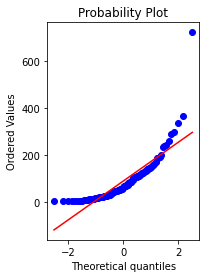

In [32]:
import matplotlib.pyplot as plt
from scipy import stats
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df[df['site'] == 1]['dwell-time'], plot=plt)

In [20]:
from statsmodels.stats import weightstats

In [25]:
_ ,p = weightstats.ztest(df[df['site'] == 0]['dwell-time'], df[df['site'] == 1]['dwell-time'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.8136645546620853
Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.
